## Assignment 1 : Zipf's and Heap's Law for Any Indic Language of My Choice

## Tasks:

#### 1. Extract the corpus using the language of your choice from wikidump. The link and sample code are given
#### 2. Browse the content to check if preprocessing required- For example, removal of  =, English words, numbers, etc.
#### 3. Find the number of tokens and types or vocabulary
#### 4. Verify if it confirms to Zipf's empirical law
#### 5. Find out how well Heap's law adheres to the real data. Display the predicted and the actual data in a graph. To do this, for every wiki, compute the number of tokens and the vocabulary. What do you observe? Do you see any flattening of the curve as you process more number of wiki pages?

#### Install and Import Required Libraries

In [ ]:
# pip install wiki-dump-reader
# pip install mplcursors

In [ ]:
pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.1 MB/s eta 0:00:00


In [ ]:
pip install mplcursors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21047 sha256=fa2459e5b961d09a3c6b01c92288535400fe2d0f992e2aa14304e687afa2ea32
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2e2d41fb52450de918a6785
Successfully built mplcursors


In [ ]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from nltk import FreqDist
import matplotlib.pyplot as plt
import mplcursors
import os
import glob
import numpy as np
import pandas as pd
import regex as re
import pickle
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Mount Google Drive to Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Store All Text Files Inside a List

In [ ]:
corpus_files = glob.glob(os.path.join(r"/content/drive/MyDrive/NLP/Eng_Data/wiki", '*.txt'))

Take first 5 text files to implement and check the logics

In [ ]:
corpus_files_2=corpus_files[:5]

In [ ]:
corpus_files_2

['/content/drive/MyDrive/NLP/Eng_Data/wiki/wiki_ek.txt',
 '/content/drive/MyDrive/NLP/Eng_Data/wiki/wiki_ad.txt',
 '/content/drive/MyDrive/NLP/Eng_Data/wiki/wiki_bo.txt',
 '/content/drive/MyDrive/NLP/Eng_Data/wiki/wiki_cf.txt',
 '/content/drive/MyDrive/NLP/Eng_Data/wiki/wiki_fj.txt']

## Train Sentence Piece Tokenizer on Whole Corpus to Build a Model to Tokenize

In [ ]:
import sentencepiece as spm

spm.SentencePieceTrainer.Train(input=corpus_files,model_prefix="m",vocab_size=20000,model_type="bpe",input_format="text")

# makes segmenter instance and loads the model file (m.model)
sp = spm.SentencePieceProcessor()
sp.load('m.model')


#### Save The Model in Drive ( Don't need to train the model every time )

In [ ]:
with open('/content/drive/MyDrive/NLP/sp_model.pkl', 'wb') as fp:
    pickle.dump(sp, fp)

#### Load The Model from Drive

In [ ]:
file = open('/content/drive/MyDrive/NLP/sp_model.pkl','rb')
model_1 = pickle.load(file)

In [ ]:
model_1

<sentencepiece.SentencePieceProcessor; proxy of <Swig Object of type 'sentencepiece::SentencePieceProcessor *' at 0x7c32af3677e0> >

#### Used The Trained Model to Tokenize Single Text File

In [ ]:
with open(corpus_files_2[0], 'r', encoding='utf-8') as file:
  corpus = file.read()  ### Read the Text File
tokens=model_1.encode_as_pieces(corpus) ### Tokenization

### Preprocessing
cleaned_tokens = [token[1:] if token.startswith('▁') else token for token in tokens]
cleaned_tokens = [token.lower() for token in cleaned_tokens]  ### Casefold all the words

cleaned_tokens = [token for token in cleaned_tokens if token not in string.punctuation and token.isalpha()]  ### Remove Punctuations and Neumaric/Alpha Neumarics
stop_words = set(stopwords.words('english'))
cleaned_tokens = [token for token in cleaned_tokens if token not in stop_words]  ### Remove Stopwards

##### Before Preprocessing

In [ ]:
tokens[:10]

['▁y',
 '▁a',
 '▁Dutch',
 '▁politician',
 ',',
 '▁from',
 '▁April',
 '▁1998',
 '▁until',
 '▁March']

#### After Preprocessing

In [ ]:
cleaned_tokens[:10]

['dutch',
 'politician',
 'april',
 'march',
 'council',
 'city',
 'amsterdam',
 'amsterdam',
 'mob',
 'iel']

In [ ]:
len(set(tokens))/len(tokens)

0.016818828303110163

In [ ]:
from nltk import FreqDist
freq_dist = FreqDist(cleaned_tokens)
freq_dist

FreqDist({'sh': 5589, 'first': 2940, 'born': 2794, 'similar': 2600, 'k': 2568, 'b': 2553, 'one': 2374, 'world': 2216, 'c': 2127, 'h': 2121, ...})

### Check Zipf's Law for Single Text File

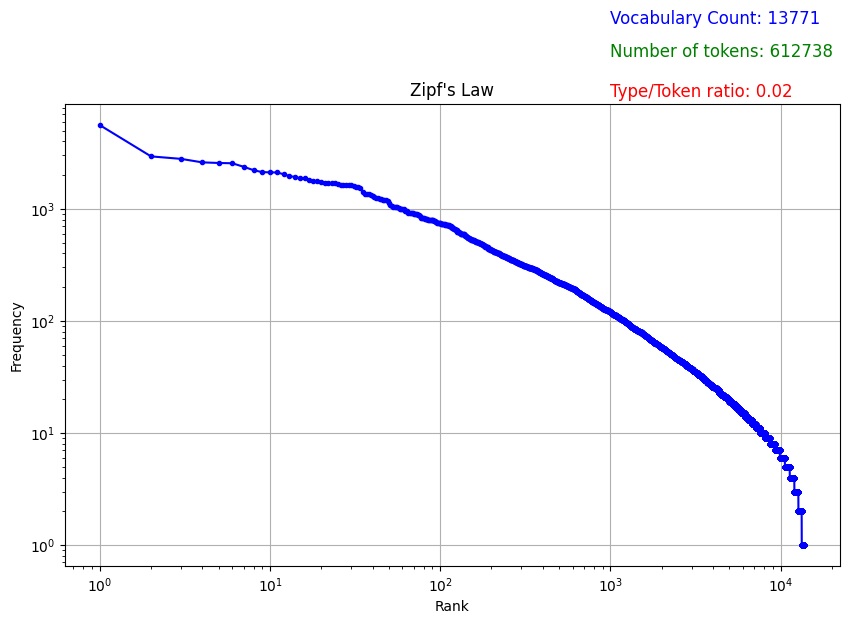

In [ ]:
# Calculate word frequency using NLTK's FreqDist
freq_dist = FreqDist(cleaned_tokens)
# Sort the words by frequency in descending order
sorted_words = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)

# Extract the word frequencies and ranks
frequencies = [freq for _, freq in sorted_words]
ranks = list(range(1, len(frequencies) + 1))

# Plot Zipf's law
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker='.', linestyle='solid', color='b')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Law")
plt.grid(True)
plt.text(1000, 45000, f'Vocabulary Count: {len(set(cleaned_tokens))}', fontsize=12, color='blue')
plt.text(1000, 23000, f'Number of tokens: {len(cleaned_tokens)}', fontsize=12, color='green')
plt.text(1000, 10000, f'Type/Token ratio: {len(set(cleaned_tokens))/len(cleaned_tokens):.2f}', fontsize=12, color='red')

# Add annotations on mouseover
cursor = mplcursors.cursor(hover=True)

@cursor.connect("add")
def on_add(cursor_position):
    x, y = cursor_position.target[0], cursor_position.target[0]
    cursor_position.annotation.set_text(f'({sorted_words[int(round(x))][0]}, {sorted_words[int(round(x))][1]})')

# plt.savefig("./Images/zipf.pdf", format="pdf", bbox_inches="tight")

plt.show()

### Define a Function to Calculate Corpus Sizes of every text files and Their Vocabulary

In [ ]:
def calc_counts(corpus_files):
  #This stores frequency of tokens
  total_vocabulary=FreqDist([])
  #This stores the vocabulry of each file
  vocabulary_sizes = [0]
  #This stores the number of tokens in each file
  corpus_sizes = [0]
  for file_name in corpus_files:
      # Read the file
      with open(file_name, 'r', encoding='utf-8') as file:
          corpus = file.read().lower()
      # Tokenize the corpus using our trained model
      tokens=model_1.encode_as_pieces(corpus)
      # Preprocessing
      cleaned_tokens = [token[1:] if token.startswith('▁') else token for token in tokens]
      # cleaned_tokens = [token.lower() for token in cleaned_tokens]
      cleaned_tokens = [token for token in cleaned_tokens if token not in string.punctuation and token.isalpha()]  ### Remove Punctuations and Neumaric/Alpha Neumarics
      stop_words = set(stopwords.words('english'))
      cleaned_tokens = [token for token in cleaned_tokens if token not in stop_words]  ### Remove Stopwards
      freq_dist = FreqDist(cleaned_tokens)

      total_vocabulary=total_vocabulary+freq_dist
      # Calculate the vocabulary size and corpus size
      vocabulary_size = len(total_vocabulary)
      corpus_size = len(cleaned_tokens) + corpus_sizes[-1]
      # Add the values to the lists
      vocabulary_sizes.append(vocabulary_size)

      corpus_sizes.append(corpus_size)

  return vocabulary_sizes, corpus_sizes, total_vocabulary

### First Try On 5 Text Files

In [ ]:
corpus_files_2

['/content/drive/MyDrive/NLP/Eng_Data/wiki/wiki_ek.txt',
 '/content/drive/MyDrive/NLP/Eng_Data/wiki/wiki_ad.txt',
 '/content/drive/MyDrive/NLP/Eng_Data/wiki/wiki_bo.txt',
 '/content/drive/MyDrive/NLP/Eng_Data/wiki/wiki_cf.txt',
 '/content/drive/MyDrive/NLP/Eng_Data/wiki/wiki_fj.txt']

In [ ]:
vocabulary_sizes, corpus_sizes, total_vocabulary=calc_counts(corpus_files_2)

In [ ]:
total_vocabulary

FreqDist({'g': 38568, 'h': 30170, 'b': 29939, 'j': 24217, 'c': 21581, 'k': 20756, 'l': 20740, 'f': 18522, 'p': 16442, 'ia': 15585, ...})

### Apply Zipf's Law For 5 Text Files

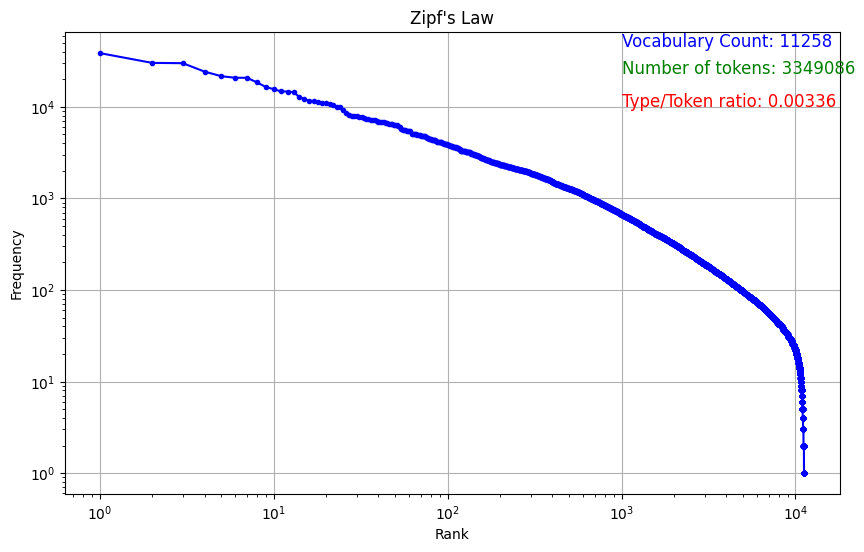

In [ ]:
# Calculate word frequency using NLTK's FreqDist
freq_dist = total_vocabulary

# Sort the words by frequency in descending order
sorted_words = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)

# Extract the word frequencies and ranks
frequencies = [freq for _, freq in sorted_words]
ranks = list(range(1, len(frequencies) + 1))

# Plot Zipf's law
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker='.', linestyle='solid', color='b')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Law")
plt.grid(True)
plt.text(1000, 45000, f'Vocabulary Count: {max(vocabulary_sizes)}', fontsize=12, color='blue')
plt.text(1000, 23000, f'Number of tokens: {max(corpus_sizes)}', fontsize=12, color='green')
plt.text(1000, 10000, f'Type/Token ratio: {max(vocabulary_sizes)/max(corpus_sizes):.5f}', fontsize=12, color='red')

# Add annotations on mouseover
cursor = mplcursors.cursor(hover=True)

@cursor.connect("add")
def on_add(cursor_position):
    x, y = cursor_position.target[0], cursor_position.target[0]
    cursor_position.annotation.set_text(f'({sorted_words[int(round(x))][0]}, {sorted_words[int(round(x))][1]})')

# plt.savefig("./Images/zipf.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [ ]:
vocabulary_sizes = np.array(vocabulary_sizes[1:])
corpus_sizes = np.array(corpus_sizes[1:])

# Fit Heap's Law model using log-log transformation
log_corpus_sizes = np.log(corpus_sizes)
log_vocabulary_sizes = np.log(vocabulary_sizes)
# log_corpus_sizes=np.append(log_corpus_sizes,0)
# log_vocabulary_sizes=np.append(log_vocabulary_sizes,0)
# Fit a linear regression line
coeffs = np.polyfit(log_corpus_sizes, log_vocabulary_sizes, deg=1)
beta = coeffs[0]
k = np.exp(coeffs[1])


### Apply Heap's Law For 5 Text Files

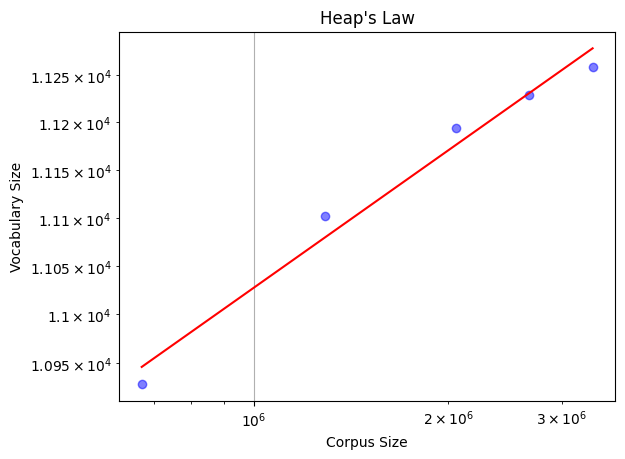

In [ ]:
plt.scatter(corpus_sizes, vocabulary_sizes, color='b', alpha=0.5)
plt.xlabel('Corpus Size')
plt.ylabel('Vocabulary Size')

# Plot Heap's Law line
x = np.array(corpus_sizes)
y = k * (x ** beta)
plt.plot(x, y, color='r')

# Set logarithmic scale for better visualization
plt.xscale('log')
plt.yscale('log')

# plt.text(30000, 8000, f'\u03B2 =  {beta:.2f} and K = {k:.2f}', fontsize=12, color='blue')

plt.title("Heap's Law")
plt.grid(True)
# plt.savefig('Zipfs.pdf')
plt.show()

### Now Apply the Function on Whole Corpus (All Text Files)

In [ ]:
vocabulary_sizes, corpus_sizes, total_vocabulary=calc_counts(corpus_files)

In [ ]:
total_vocabulary

FreqDist({'b': 1110958, 'j': 964774, 'c': 876552, 'l': 808456, 'k': 797313, 'f': 733992, 'g': 688893, 'p': 665134, 'h': 648309, 'n': 599052, ...})

In [ ]:
total_vocabulary

FreqDist({'b': 1110958, 'j': 964774, 'c': 876552, 'l': 808456, 'k': 797313, 'f': 733992, 'g': 688893, 'p': 665134, 'h': 648309, 'n': 599052, ...})

Save The Vocabulary Dictionary for Later Use

In [ ]:
import pickle

# save dictionary to person_data.pkl file
with open('/content/drive/MyDrive/NLP/vocab_new.pkl', 'wb') as fp:
    pickle.dump(total_vocabulary, fp)

### Apply Zipf's Law For All Text Files

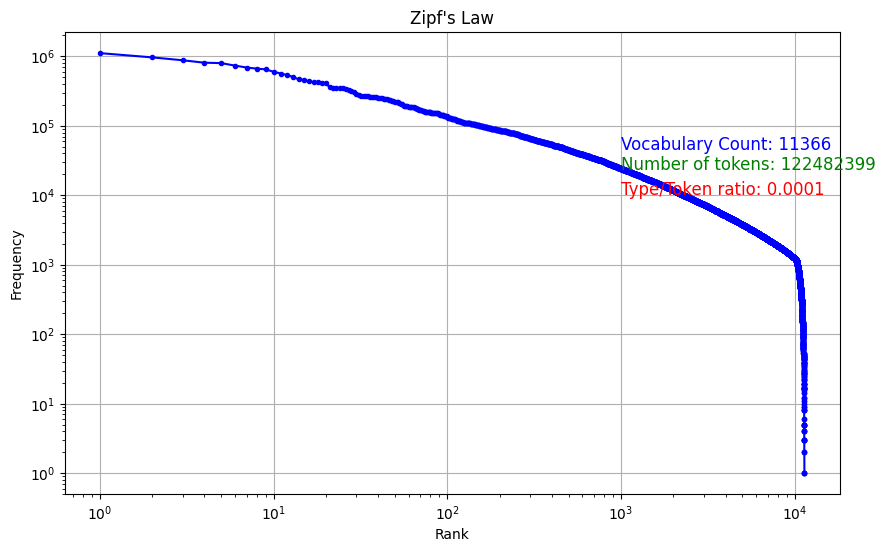

In [ ]:
# Calculate word frequency using NLTK's FreqDist
freq_dist = total_vocabulary

# Sort the words by frequency in descending order
sorted_words = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)

# Extract the word frequencies and ranks
frequencies = [freq for _, freq in sorted_words]
ranks = list(range(1, len(frequencies) + 1))

# Plot Zipf's law
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker='.', linestyle='solid', color='b')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Law")
plt.grid(True)
plt.text(1000, 45000, f'Vocabulary Count: {max(vocabulary_sizes)}', fontsize=12, color='blue')
plt.text(1000, 23000, f'Number of tokens: {max(corpus_sizes)}', fontsize=12, color='green')
plt.text(1000, 10000, f'Type/Token ratio: {max(vocabulary_sizes)/max(corpus_sizes):.4f}', fontsize=12, color='red')

# Add annotations on mouseover
cursor = mplcursors.cursor(hover=True)

@cursor.connect("add")
def on_add(cursor_position):
    x, y = cursor_position.target[0], cursor_position.target[0]
    cursor_position.annotation.set_text(f'({sorted_words[int(round(x))][0]}, {sorted_words[int(round(x))][1]})')

# plt.savefig("./Images/zipf.pdf", format="pdf", bbox_inches="tight")

plt.show()

From the above graph we can varify the Zipf's emperical law. We can also observe that there is a sharp drop at the right tail of the curve.

In [ ]:
vocabulary_sizes = np.array(vocabulary_sizes[1:])
corpus_sizes = np.array(corpus_sizes[1:])

# Fit Heap's Law model using log-log transformation
log_corpus_sizes = np.log(corpus_sizes[1:])
log_vocabulary_sizes = np.log(vocabulary_sizes[1:])

# Fit a linear regression line
coeffs = np.polyfit(log_corpus_sizes, log_vocabulary_sizes, deg=1)
beta = coeffs[0]
k = np.exp(coeffs[1])


In [ ]:
beta

0.0019895620922965045

In [ ]:
k

10961.628694868648

### Apply Heap's Law For All Text Files ( Log_Scaled)

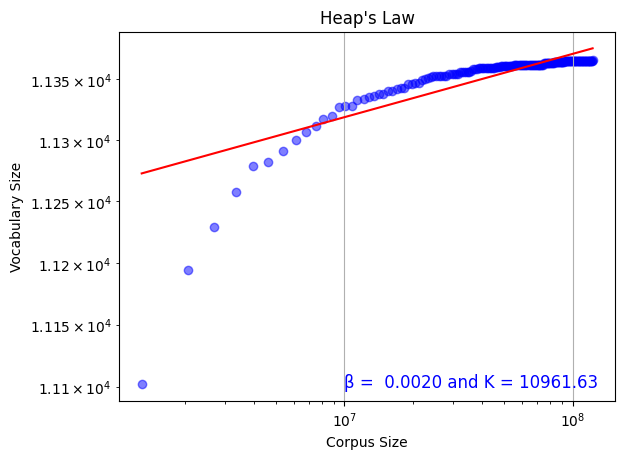

In [ ]:
plt.scatter(corpus_sizes, vocabulary_sizes, color='b', alpha=0.5)
plt.xlabel('Corpus Size')
plt.ylabel('Vocabulary Size')

# Plot Heap's Law line
x = np.array(corpus_sizes)
y = k * (x ** beta)
plt.plot(x, y, color='r')

# Set logarithmic scale for better visualization
plt.xscale('log')
plt.yscale('log')


plt.text(10000000, 11100, f'\u03B2 =  {beta:.4f} and K = {k:.2f}', fontsize=12, color='blue')

plt.title("Heap's Law")
plt.grid(True)
# plt.savefig('Zipfs.pdf')
plt.show()

From the above graph we can varify how well Heap's law adheres to the real data. We can also observe that the curve is flattening I process more number of wiki pages. That is corpus sizes increases but after a certain time vocabulary sizes almost remains fixed.

#### Heap's Law Without Log_Scale

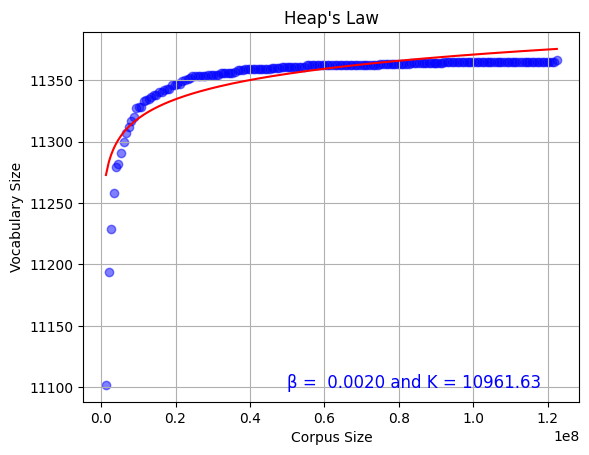

In [ ]:
plt.scatter(corpus_sizes, vocabulary_sizes, color='b', alpha=0.5)
plt.xlabel('Corpus Size')
plt.ylabel('Vocabulary Size')

# Plot Heap's Law line
x = np.array(corpus_sizes)
y = k * (x ** beta)
plt.plot(x, y, color='r')

plt.text(50000000, 11100, f'\u03B2 =  {beta:.4f} and K = {k:.2f}', fontsize=12, color='blue')
plt.title("Heap's Law")
plt.grid(True)
# plt.savefig('Zipfs.pdf')
plt.show()

### If we use nltk word tokenizer then we will get ----

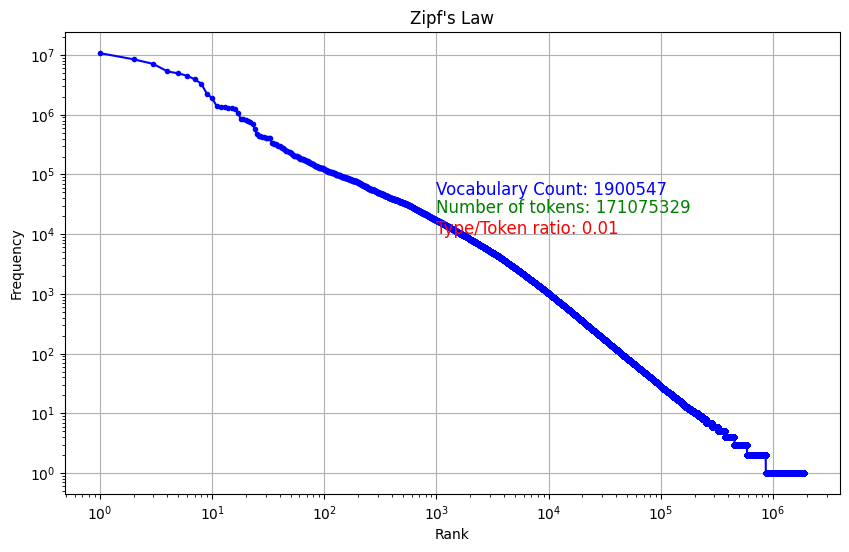

In [ ]:
# Calculate word frequency using NLTK's FreqDist
freq_dist = total_vocabulary

# Sort the words by frequency in descending order
sorted_words = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)

# Extract the word frequencies and ranks
frequencies = [freq for _, freq in sorted_words]
ranks = list(range(1, len(frequencies) + 1))

# Plot Zipf's law
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker='.', linestyle='solid', color='b')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Law")
plt.grid(True)
plt.text(1000, 45000, f'Vocabulary Count: {max(vocabulary_sizes)}', fontsize=12, color='blue')
plt.text(1000, 23000, f'Number of tokens: {max(corpus_sizes)}', fontsize=12, color='green')
plt.text(1000, 10000, f'Type/Token ratio: {max(vocabulary_sizes)/max(corpus_sizes):.2f}', fontsize=12, color='red')

# Add annotations on mouseover
cursor = mplcursors.cursor(hover=True)

@cursor.connect("add")
def on_add(cursor_position):
    x, y = cursor_position.target[0], cursor_position.target[0]
    cursor_position.annotation.set_text(f'({sorted_words[int(round(x))][0]}, {sorted_words[int(round(x))][1]})')

# plt.savefig("./Images/zipf.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [ ]:
vocabulary_sizes = np.array(vocabulary_sizes[1:])
corpus_sizes = np.array(corpus_sizes[1:])

# Fit Heap's Law model using log-log transformation
log_corpus_sizes = np.log(corpus_sizes)
log_vocabulary_sizes = np.log(vocabulary_sizes)
# log_corpus_sizes=np.append(log_corpus_sizes,0)
# log_vocabulary_sizes=np.append(log_vocabulary_sizes,0)
# Fit a linear regression line
coeffs = np.polyfit(log_corpus_sizes, log_vocabulary_sizes, deg=1)
beta = coeffs[0]
k = np.exp(coeffs[1])


In [ ]:
beta

0.6439969742729508

In [ ]:
k

9.747334987211639

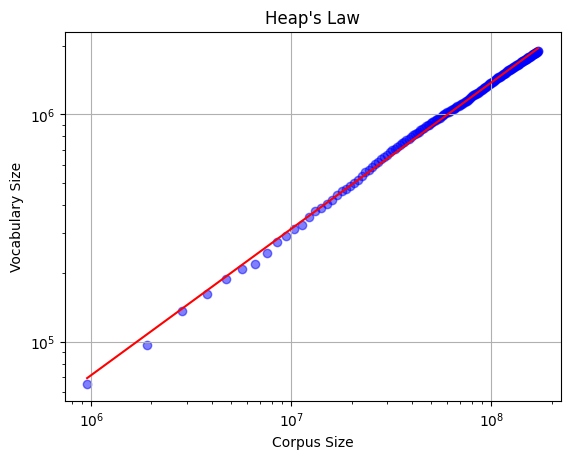

In [ ]:
plt.scatter(corpus_sizes, vocabulary_sizes, color='b', alpha=0.5)
plt.xlabel('Corpus Size')
plt.ylabel('Vocabulary Size')

# Plot Heap's Law line
x = np.array(corpus_sizes)
y = k * (x ** beta)
plt.plot(x, y, color='r')

# Set logarithmic scale for better visualization
plt.xscale('log')
plt.yscale('log')

# plt.text(30000, 8000, f'\u03B2 =  {beta:.2f} and K = {k:.2f}', fontsize=12, color='blue')

plt.title("Heap's Law")
plt.grid(True)
# plt.savefig('Zipfs.pdf')
plt.show()